In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px



Part 1 - EDA <a class="anchor" id="eda"></a>
1. [Which 3 features have the highest number of missing values](#question_1)
2. [How the price behave over the years?](#question_2)
3. [Plot the the feature distribution using histograms](#question_3)
4. [Compute and order the features by their correlation with label](#question_4)
5. [Add more EDA that will help you understand the data and support your modeling decisions](#question_5)

In [2]:
df = pd.read_csv('train.csv') 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(exclude=['int', 'float']).columns

df_num = df[numerical_columns]
df_cat = df[categorical_columns.tolist() + ['SalePrice']]

df_num.info()
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

### 3 features with the highest number of missing values <a class="anchor" id="question_1"></a>

<Axes: >

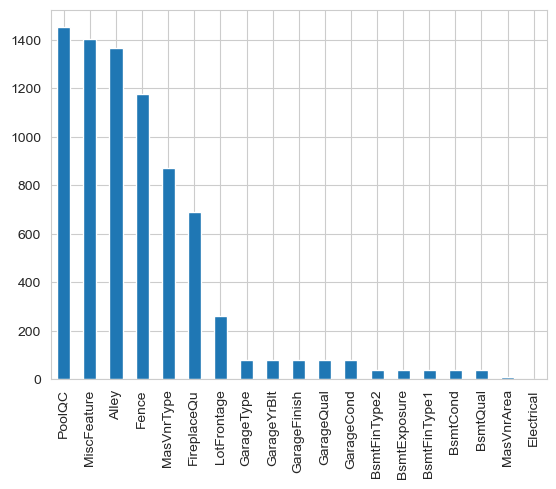

In [4]:
sns.set_style("whitegrid")
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0]
missing_val.sort_values(ascending=False, inplace=True)
missing_val.plot.bar()

In [5]:
# Percent of missing values
missing_val / df.shape[0] *100


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

### How the price behave over the years? <a class="anchor" id="question_2"></a>
[back to EDA](#EDA)

In [48]:
prices_over_years = df.loc[:,(['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'SalePrice'])]
mo_of_sale = df['MoSold'].astype (str) + '.' + df['YrSold'].astype (str)
prices_over_years.insert(2, 'DateSold', pd.to_datetime(mo_of_sale,format="%m.%Y"))
prices_over_years


,MoSold,YrSold,DateSold,YearBuilt,YearRemodAdd,SalePrice
0,2,2008,2008-02-01,2003,2003,208500
1,5,2007,2007-05-01,1976,1976,181500
2,9,2008,2008-09-01,2001,2002,223500
3,2,2006,2006-02-01,1915,1970,140000
4,12,2008,2008-12-01,2000,2000,250000
...,...,...,...,...,...,...
1455,8,2007,2007-08-01,1999,2000,175000
1456,2,2010,2010-02-01,1978,1988,210000
1457,5,2010,2010-05-01,1941,2006,266500
1458,4,2010,2010-04-01,1950,1996,142125


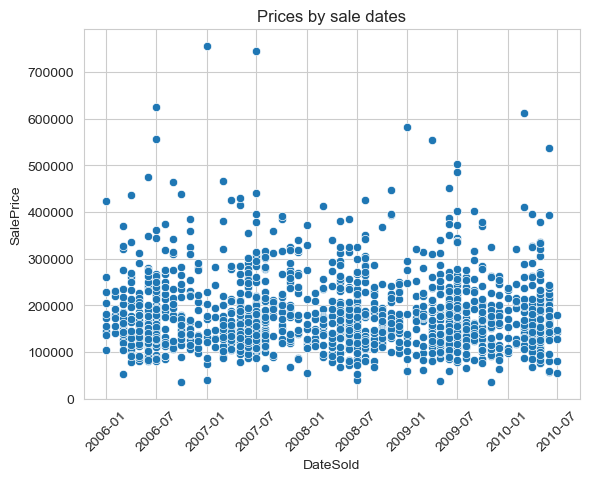

In [49]:
sns.scatterplot(data=prices_over_years, x="DateSold", y="SalePrice").set_title('Prices by sale dates')
plt.xticks(rotation=45)
plt.show()

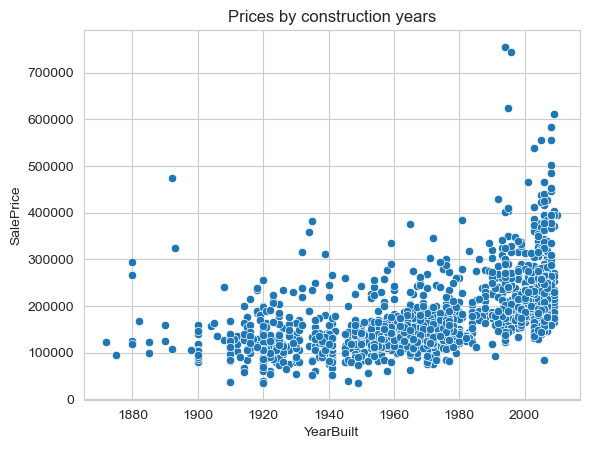

In [50]:
sns.scatterplot(data=prices_over_years, x="YearBuilt", y="SalePrice").set_title('Prices by construction years')
plt.show()

### Plot the the feature distribution using histograms <a class="anchor" id="question_3"></a>
[back to EDA](#EDA)


<Figure size 640x480 with 0 Axes>

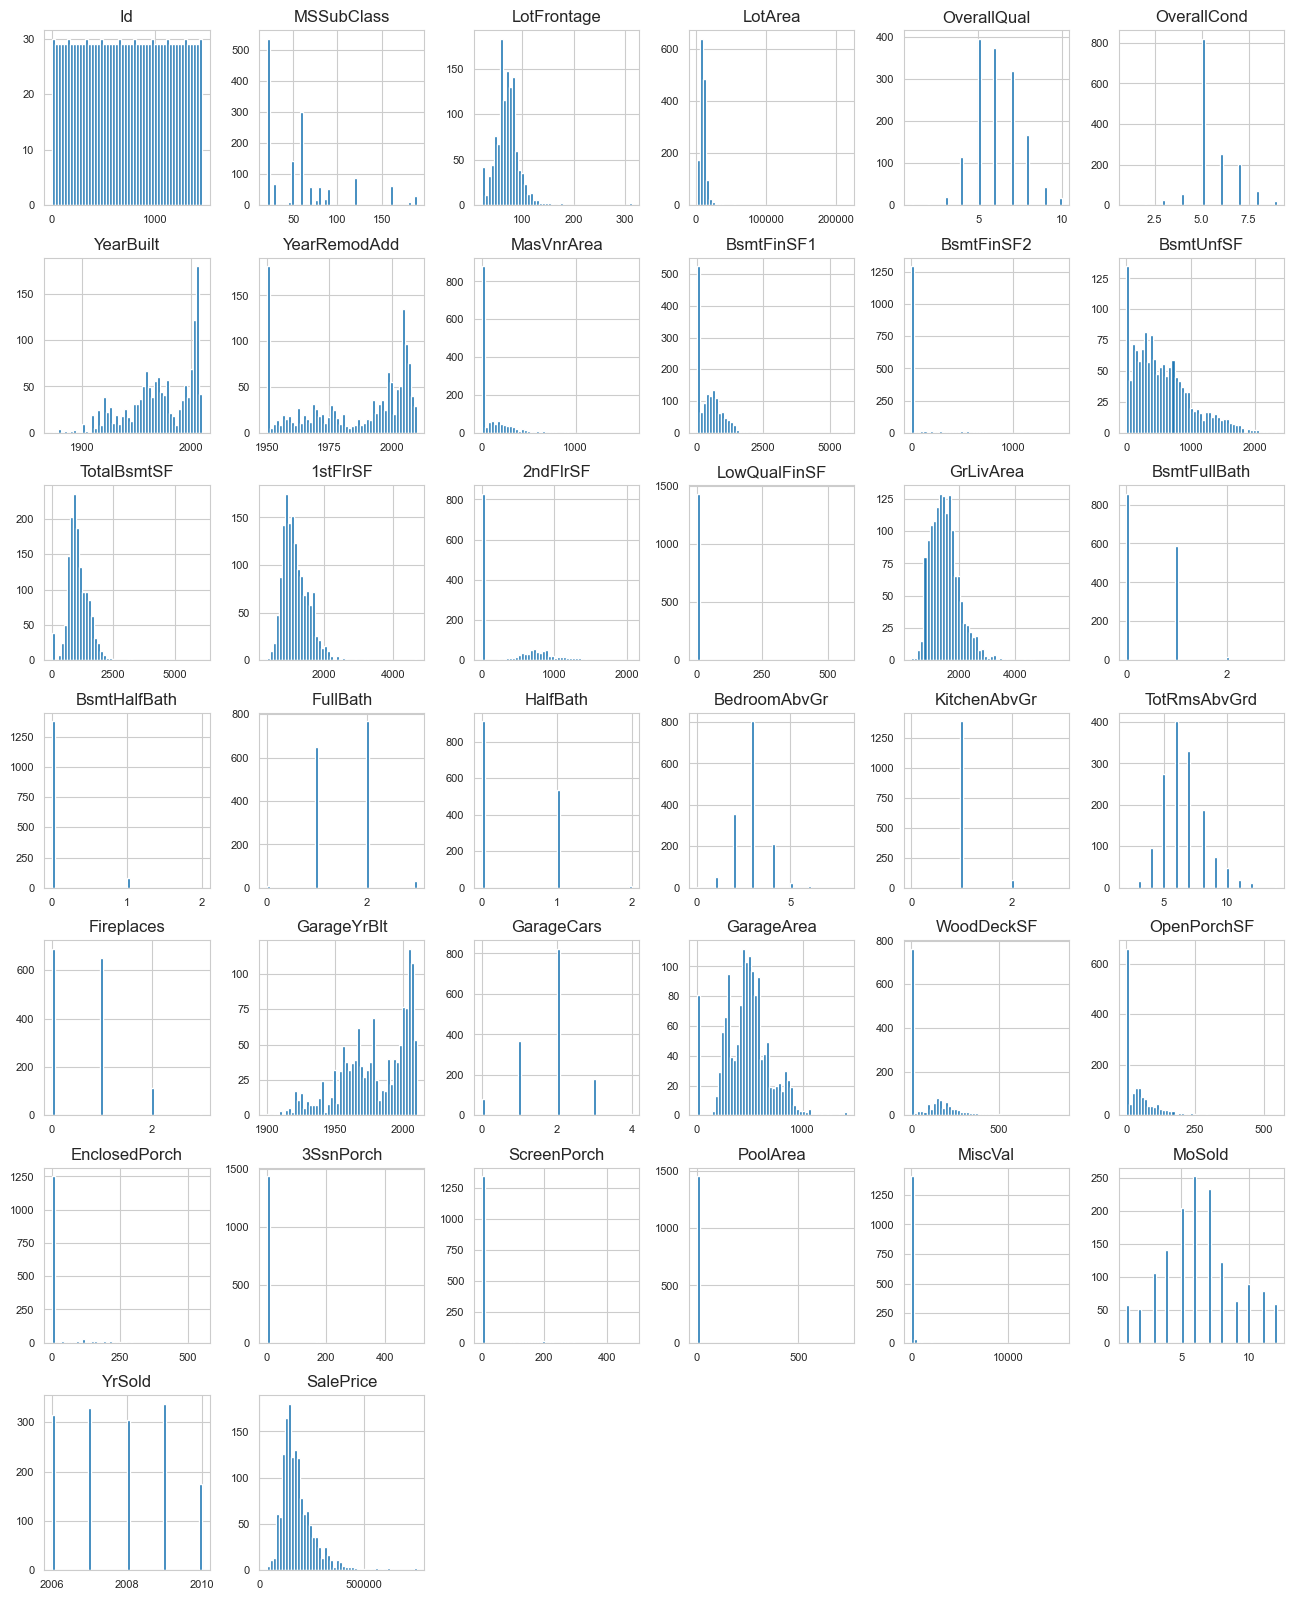

In [51]:
plt.figure()

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

plt.show()

### Compute and order the features by their correlation with label <a class="anchor" id="question_4"></a>
[back to EDA](#EDA)

In [52]:
# Calculate correlations
correlations = df_num.corr()['SalePrice'].drop('SalePrice')

# Sort correlations in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Print top 10 of sorted correlations with feature names
print(sorted_correlations[:10])

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


### 1.5 More EDA <a class="anchor" id="question_5"></a>
[back to EDA](#EDA)

### Handle with missing values

In [6]:
missing_val

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

**PoolQC:** Pool quality 
>Ex Excellent <br>Gd Good <br>TA Average/Typical <br>Fa Fair <br>NA No Pool

**Alley:** Type of alley access to property

>Grvl	Gravel <br>Pave	Paved <br>NA 	No alley access

**Fence:** Fence quality
>GdPrv	Good Privacy <br>MnPrv	Minimum Privacy <br>GdWo	Good Wood <br>MnWw	Minimum Wood/Wire <br>NA	No Fence

Since 'NA' doesn't appear as a separate value in the columns above, for the columns 'PoolQC', 'Alley' and 'Fence' we can consider it as significant information meaning 'No Pool', 'No alley access' and 'No Fence' respectfully. It may be useful for our main goal and later we will need to fill them with 'NA' label.

Also, information about the Pool should match between the columns 'PoolQC' and 'PoolArea', let's check it:



In [7]:
df[df['PoolArea']!=0]['PoolArea'].count() == df[~df['PoolQC'].isna()]['PoolQC'].count()

True

**MiscFeature:** Miscellaneous feature not covered in other categories 
>Elev Elevator <br>Gar2 2nd Garage (if not described in garage section) <br>Othr Other <br>Shed Shed (over 100 SF) <br>TenC Tennis Court <br>NA None

This column should be read in conjunction with 'MiscVal' - Value of miscellaneous feature.

Let's see which values appear in this column.

In [11]:
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

Note, that in train set didn't appear Elevator, but it could be in test set.

In [39]:
df[['MiscFeature', 'MiscVal']].groupby('MiscFeature').value_counts()

MiscFeature  MiscVal
Gar2         8300        1
             15500       1
Othr         3500        1
             0           1
Shed         400        11
             500         8
             700         5
             450         4
             600         4
             2000        3
             1200        2
             480         2
             2500        1
             1400        1
             1300        1
             1150        1
             800         1
             560         1
             620         1
             350         1
             54          1
             0           1
TenC         2000        1
Name: count, dtype: int64

Observations:
* We see two lots having second garage and their area in 'MiscVal' column. We can sum this values with 'GarageArea' and use binary feature 'Gar2' instead.
* Two lots having 'MiscFeature' == 'Othr' with values 0 and 3500, maybe we can just drop it.
* 49 lots have Shed (over 100 SF), we can create new binary feature 'Shed' and/or create 'ShedArea' with values from 'MiscValue' and 0 if no Shed.
* There is a tennis court on one lot. We can also make binary feature with it.

Take a look on **Garage Feature**:

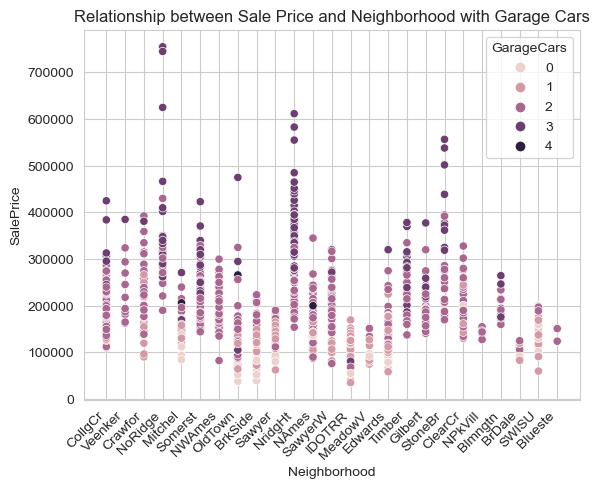

In [74]:
sns.scatterplot(data=df, x="Neighborhood", y="SalePrice", hue='GarageCars').set_title('Relationship between Sale Price and Neighborhood with Garage Cars')
plt.xticks(rotation=45, ha='right')
plt.show()

Note that some of areas don't even have garages for 1 car, meanwhile other eather has no garage (car==0) or has garage only for 1 car.

c:\Users\dmitr\miniconda3\envs\y_data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dmitr\miniconda3\envs\y_data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


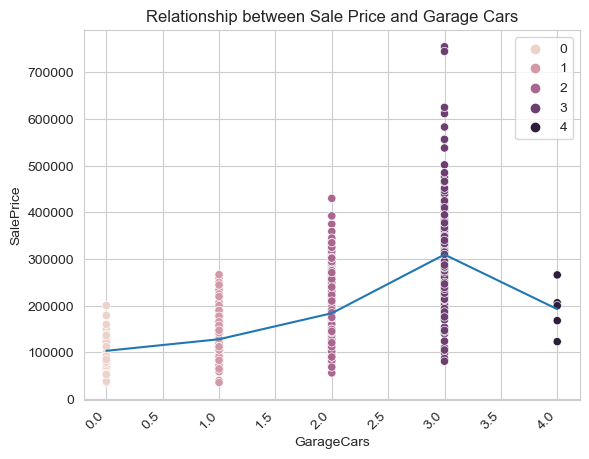

In [77]:
sns.scatterplot(data=df, x="GarageCars", y="SalePrice", hue='GarageCars').set_title('Relationship between Sale Price and Garage Cars')

mean_prices = df.groupby('GarageCars')['SalePrice'].mean()
sns.lineplot(x=mean_prices.index, y=mean_prices.values)


plt.xticks(rotation=45, ha='right')
plt.show()

Note that on average the number of cars in the garage increases the cost of the house.
Let's now have a look on **Garage** missing values. Check that 

In [88]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea']
missing_counts = df[garage_columns].isnull().sum()
print(missing_counts)


GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
GarageCars       0
GarageArea       0
dtype: int64


Check 
1. if 'GarageCars' and 'GarageArea' have zero values only when 'GarageType' is NaN </br>and
2. if 'GarageType' is NaN, 'GarageCars', and 'GarageArea' have only zero values

In [100]:
cond_1 = (df['GarageType'].isnull())
cond_2 =  ((df['GarageCars'] == 0) | (df['GarageArea'] == 0))

print(df[cond_1 & ~cond_2].empty)
print(df[~cond_1 & cond_2].empty)



True
True


So, the conditions are met. In the future, we can fill in the missing values with NA.

Next feature **MasVnrType**: Masonry veneer type
>BrkCmn	Brick Common </br>BrkFace	Brick Face </br>CBlock	Cinder Block </br>None	None </br>Stone	Stone

and we also have feature </br>	
**MasVnrArea**: Masonry veneer area in square feet


In [116]:
df[(df['MasVnrType'].isna()) & (df['MasVnrArea'] != 0)]['MasVnrArea']

234       NaN
529       NaN
624     288.0
650       NaN
773       1.0
936       NaN
973       NaN
977       NaN
1230      1.0
1243      NaN
1278      NaN
1300    344.0
1334    312.0
Name: MasVnrArea, dtype: float64

Check 
1. if 'MasVnrArea' have zero values only when 'MasVnrType' is NaN </br>and
2. if 'MasVnrType' is NaN, 'MasVnrArea' have only zero values

In [105]:
cond_1 = (df['MasVnrType'].isna())
cond_2 =  (df['GarageArea'] == 0)

print(df[cond_1 & ~cond_2].empty)
print(df[~cond_1 & cond_2].empty)

False
False


So, the conditions are not met. Let's take a closer look

In [110]:
sns.scatterplot

0

Next feature FireplaceQu.

Next feature LotFrontage.

Pool, Alley, Fence fill na with string

In [55]:
df.loc[:,'PoolQC'].fillna('NoPool', inplace=True)
df.loc[:,'Alley'].fillna('NoAccess', inplace=True)
df.loc[:,'Fence'].fillna('NoFence', inplace=True)
df.loc[:,'FireplaceQu'].fillna('NoFireplace', inplace=True)


Most of values MasVnrArea are 0 if MasVnrType is missing, but some of them has non zero value

In [56]:
mva = df[df.loc[:,'MasVnrType'].isna()]['MasVnrArea']
mva[mva > 0]


624     288.0
773       1.0
1230      1.0
1300    344.0
1334    312.0
Name: MasVnrArea, dtype: float64

Meanwhile two rows have existing MasVnrType while MasVnrArea == 0.


In [57]:
mvt = df[df.loc[:,'MasVnrArea'] == 0]['MasVnrType']
print(mvt.unique())
mvt[~mvt.isna()]



[nan 'BrkFace' 'Stone']


688     BrkFace
1241      Stone
Name: MasVnrType, dtype: object

In [58]:
# Replace MasVnrArea with 0 where MasVnrArea==1
index_mva = df[df.loc[:,'MasVnrArea'] == 1].index
df.loc[index_mva,'MasVnrArea'] = 0

# Replace MasVnrType in rows where MasVnrArea==0 with 'NoMasVnr' 
index_mvt = df[(df.loc[:,'MasVnrArea'] == 0) & (~df.loc[:,'MasVnrType'].isna())].index
df.loc[index_mvt,'MasVnrType'] = 'NoMasVnr'

# Fill missing values in MasVnrType with 'NoMasVnr' 
df.loc[:,'MasVnrType'].fillna('NoMasVnr', inplace=True)


In [59]:
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0]
missing_val.sort_values(ascending=False, inplace=True)
missing_val

MiscFeature     1406
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

LotFrontage has 259 missing values. Let's use an SVM Regressor algorithm to estimate and fill in these missing values.

In [60]:
train_LF = df[~df.LotFrontage.isnull()]
test_LF = df[df.LotFrontage.isnull()]
target = train_LF['LotFrontage']

print(f"Number of filled LotFrontage data: {len(train_LF)}")
print(f"Number of missing LotFrontage data: {len(test_LF)}")

display(pd.DataFrame(df['LotFrontage'].describe()).transpose())

Number of filled LotFrontage data: 1201
Number of missing LotFrontage data: 259


,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0


Now, let's look at the LotFrontage values in the Train LotFrontage dataset using a boxplot and distribution plot. Here's what we can see:

* Many properties have low LotFrontage values, shown as a peak on the left side of the distribution plot. The boxplot suggests some of these values might be unusual, as they're far from the main cluster.
* There are also quite a few properties with high LotFrontage values, going beyond what's typical.

In simple terms, there are outliers present at both of the LotFrontage range.


c:\Users\dmitr\miniconda3\envs\y_data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


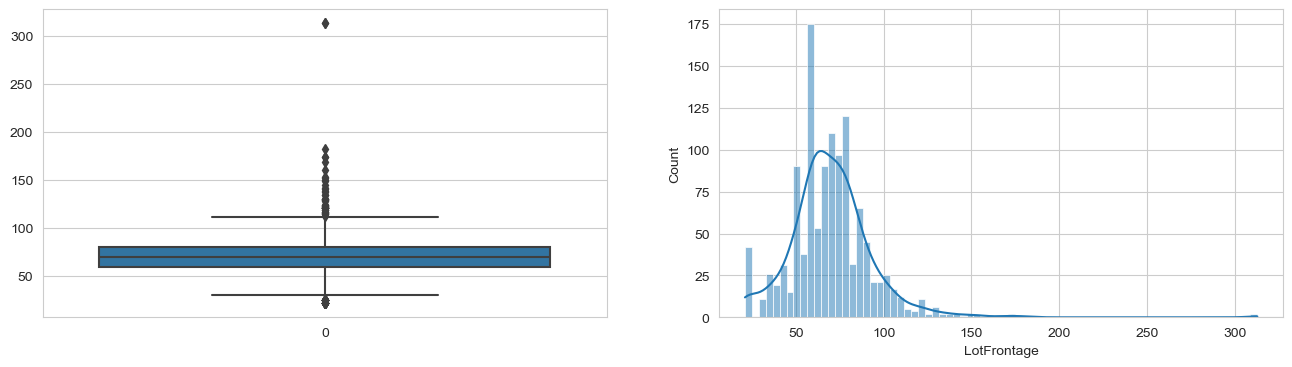

In [61]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(target, ax=ax[0])
sns.histplot(target, ax=ax[1], kde=True)
plt.show()


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Separate data into train and test sets based on LotFrontage availability
data_LF = df[~df['LotFrontage'].isnull()]

train_LF, test_LF = train_test_split(data_LF, test_size=0.2, random_state=42)

# Features and categorical features to be used for imputation
numerical_features = ['LotArea', 'GarageCars']
categorical_features = ['LotConfig', 'LotShape', 'Alley', 'MSZoning', 'BldgType', 'Neighborhood', 'Condition1', 'Condition2']

# Target variable
target = 'LotFrontage'


# 1. Data Preprocessing
X_train = train_LF[numerical_features + categorical_features]
y_train = train_LF[target]
X_test = test_LF[numerical_features + categorical_features]

# 2. Feature Engineering
numerical_transformer = SimpleImputer(strategy='mean')  # Handle missing values in numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 3. Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])
clf.fit(X_train, y_train)

# 4. Predict Missing Values
predicted_LF = clf.predict(X_test)

# 5. Evaluation
actual_LF = test_LF[target]

mae = mean_absolute_error(actual_LF, predicted_LF)
mse = mean_squared_error(actual_LF, predicted_LF)
rmse = mean_squared_error(actual_LF, predicted_LF, squared=False) 
r2 = r2_score(actual_LF, predicted_LF)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 8.840217842323653
Mean Squared Error: 203.7833530227063
Root Mean Squared Error: 14.27527068124126
R-squared: 0.5447993050689133


In [63]:

# Separate data into train and test sets based on LotFrontage availability
train_LF = df[~df['LotFrontage'].isnull()]
test_LF = df[df['LotFrontage'].isnull()]

# Features and categorical features to be used for imputation
numerical_features = ['LotArea', 'GarageCars']
categorical_features = ['LotConfig', 'LotShape', 'Alley', 'MSZoning', 'BldgType', 'Neighborhood', 'Condition1', 'Condition2']

# Target variable
target = 'LotFrontage'


# 1. Data Preprocessing
X_train = train_LF[numerical_features + categorical_features]
y_train = train_LF[target]
X_test = test_LF[numerical_features + categorical_features]

# 2. Feature Engineering
numerical_transformer = SimpleImputer(strategy='mean')  # Handle missing values in numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 3. Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest Regressor
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])
clf.fit(X_train, y_train)

# 4. Predict Missing Values
predicted_LF = clf.predict(X_test)



In [64]:
df.loc[df['LotFrontage'].isnull(), 'LotFrontage'] = predicted_LF

In [65]:
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0]
missing_val.sort_values(ascending=False, inplace=True)
missing_val

MiscFeature     1406
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [66]:
df.loc[df['GarageYrBlt'].isna(), 'GarageYrBlt'] = df.loc[df['GarageYrBlt'].isna(), 'YearBuilt']
df['GarageType'].fillna('NoGarage', inplace=True)
df['GarageFinish'].fillna('NoGarage', inplace=True)
df['GarageQual'].fillna('NoGarage', inplace=True)
df['GarageCond'].fillna('NoGarage', inplace=True)


In [67]:
df.loc[(~df['BsmtQual'].isna()),'BsmtExposure'] = 'NoBsmt'
df.loc[(~df['BsmtQual'].isna()),'BsmtFinType2'] = 'NoBsmt'

In [68]:
df.loc[df['BsmtQual'].isna()] = df.loc[df['BsmtQual'].isna()].fillna('NoBsmt')

In [69]:
masvnrarea_mode = df['MasVnrArea'].mode()[0]
electrical_mode = df['Electrical'].mode()[0]

# Fill missing values in 'MasVnrArea' and 'Electrical' columns with the modes
df['MasVnrArea'].fillna(masvnrarea_mode, inplace=True)
df['Electrical'].fillna(electrical_mode, inplace=True)

Miscellaneous feature not covered in other categories

In [70]:
df[(df['MiscVal'] != 0)][['MiscFeature']].groupby('MiscFeature').value_counts().sort_values(ascending=False)

MiscFeature
Shed    48
Gar2     2
Othr     1
TenC     1
Name: count, dtype: int64

In [71]:
# Create dummy columns based on values in MiscFeature
dummy_columns = pd.get_dummies(df['MiscFeature'], prefix='mf')

# Multiply each dummy column by corresponding MiscVal
for col in dummy_columns.columns:
    dummy_columns[col] = dummy_columns[col] * df['MiscVal']

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, dummy_columns], axis=1)

# Drop the original 'MiscFeature' column
df.drop(['MiscFeature','MiscVal'], axis=1, inplace=True)


In [72]:
df[['Street', 'Alley','LotFrontage']].groupby(['Street','Alley']).count()

LotFrontage
Street Alley                
Grvl   NoAccess            6
Pave   Grvl               50
       NoAccess         1363
       Pave               41

In [73]:
df[df['LotFrontage'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,mf_Gar2,mf_NoBsmt,mf_Othr,mf_Shed,mf_TenC
